In [1]:
import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

from scipy import stats
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns

from random import randrange

import re

import random
import pickle,pprint

from scipy.stats import gamma
from scipy.optimize import minimize

from matplotlib import rc

%matplotlib inline

In [2]:
rc('text', usetex=True)

# this is just to have figure with large fontsize
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


plt.rc('font', weight='bold')
plt.rc('xtick.major', size=5, pad=7)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rc('axes', labelsize=24)
plt.rc('axes', titlesize=24)


In [3]:
def phi(h):
    return v_max/(1+np.exp(-beta*(h-h_0)))

In [11]:
#param

d=5 #ms
v_max=0.6 #[kHZ]
mu_0=15
h_0=15
beta=1
nu=v_max/2

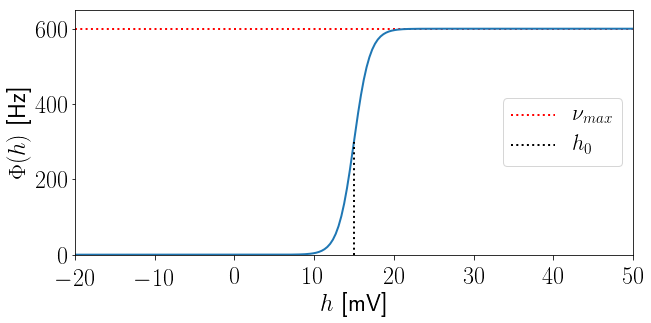

In [25]:
lim_inf=-20
lim_sup=+50
h_vec=np.linspace(-20,50,200)
phi_h=[phi(h) for h in h_vec]
v_max_vec=[1000*v_max for h in h_vec]

plt.figure(figsize=(10, 5))
plt.plot(h_vec,v_max_vec,ls=':',c='r',lw=2,label=r'\nu_{max}')
plt.plot(h_vec,1000*np.copy(phi_h),ls='-',lw=2)
plt.plot([h_0,h_0],[0,1000*v_max/2],ls=':',c='k',lw=2,label=r'$h_0$')

plt.ylim(0,1000*v_max+50)
plt.xlim(lim_inf,lim_sup)
plt.xlabel(r'$h$ [mV]')
plt.ylabel(r'$\Phi(h)$ [Hz]')
plt.legend(loc='center right', fontsize=22)
plt.gcf().subplots_adjust(bottom=0.2)

plt.savefig('phi_h.pdf')

## Poisson Process with absolute refractory period

In [77]:
def RHO_poisson(tau,nu,d):
    if tau< d:
        return 0 
    else:
        return nu

def S_poisson(tau,nu,d):
    if tau <d:
        return 1
    else:
        return np.exp(-nu*(tau-d))
    
def P_poisson(tau,nu,d):
    if tau <d:
        return 0
    else:
        return nu*np.exp(-nu*(tau-d))
    
    

def RHO_2(tau,nu,d,l):
    if tau< d:
        return 0 
    else:
        return nu*(1-np.exp(-l*(tau-d)))

def S_2(tau,nu,d,l):
    if tau <d:
        return 1
    else:
        return np.exp(-nu*(tau-d))*np.exp(RHO_2(tau,nu,d,l)/l)
    
def P_2(tau,nu,d,l):
    return RHO_2(tau,nu,d,l)*S_2(tau,nu,d,l)
    
    

In [84]:
dt=0.05
tau_max=50
N=int(tau_max/dt)
tau_vec=[(j)*dt for j in range(N+1)]

In [85]:
P_=[1000*P_poisson(t,nu,d) for t in tau_vec]
S_=[S_poisson(t,nu,d) for t in tau_vec]
RHO_=[1000*RHO_poisson(t,nu,d) for t in tau_vec]

# poisson

In [86]:
l=0.2

#t_vec=[(j)*dt for j in range(N_sim)]

In [87]:


P_2p=[1000*P_2(t,nu,d,l) for t in tau_vec]
S_2p=[S_2(t,nu,d,l) for t in tau_vec]
RHO_2p=[1000*RHO_2(t,nu,d,l) for t in tau_vec]

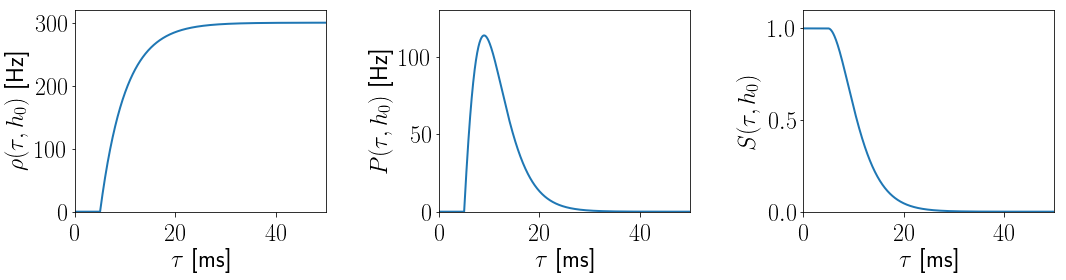

In [98]:

plt.figure(figsize=(16, 4))

plt.subplot(131)
plt.plot(tau_vec,RHO_2p,lw=2)
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$\rho(\tau,h_0)$ [Hz]')
plt.xlim(0,tau_max)
plt.ylim(0,320)
#plt.title(r'$ \nu= {}\:,\:\: \Delta={}$'.format(nu,d))

plt.subplot(132)
plt.plot(tau_vec,P_2p,lw=2)
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$P(\tau,h_0)$ [Hz]')
plt.xlim(0,tau_max)
plt.ylim(0,130)
#plt.title(r'$ \nu= {}\:,\:\: \Delta={}$'.format(nu,d))


plt.subplot(133)
plt.plot(tau_vec,S_2p,lw=2)
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$S(\tau,h_0)$')
plt.xlim(0,tau_max)
plt.ylim(0,1.1)
#plt.title(r'$ \nu= {}\:,\:\: \Delta={}$'.format(nu,d))

plt.subplots_adjust(top=0.92, bottom=0.22, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.45)
plt.savefig('expRHOSP.pdf')

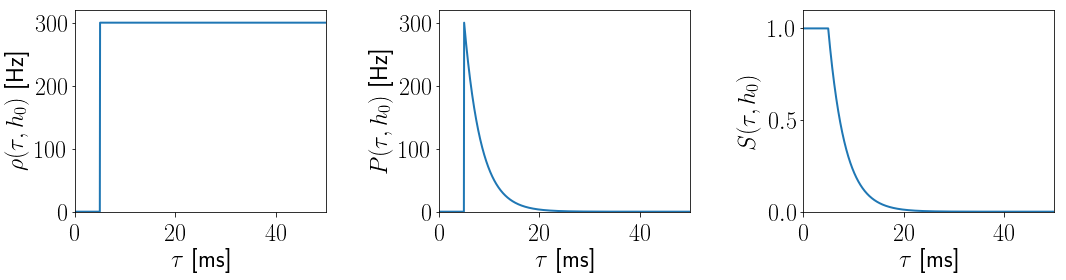

In [99]:
plt.figure(figsize=(16, 4))

plt.subplot(131)
plt.plot(tau_vec,RHO_,lw=2)
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$\rho(\tau,h_0)$ [Hz]')
plt.xlim(0,tau_max)
plt.ylim(0,320)
#plt.title(r'$ \nu= {}\:,\:\: \Delta={}$'.format(nu,d))

plt.subplot(132)
plt.plot(tau_vec,P_,lw=2)
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$P(\tau,h_0)$ [Hz]')
plt.xlim(0,tau_max)
plt.ylim(0,320)
#plt.title(r'$ \nu= {}\:,\:\: \Delta={}$'.format(nu,d))


plt.subplot(133)
plt.plot(tau_vec,S_,lw=2)
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$S(\tau,h_0)$')
plt.xlim(0,tau_max)
plt.ylim(0,1.1)
#plt.title(r'$ \nu= {}\:,\:\: \Delta={}$'.format(nu,d))

plt.subplots_adjust(top=0.92, bottom=0.22, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.45)
plt.savefig('poissonRHOSP.pdf')

In [100]:
def eigenvalue_Poisson(n,nu,d):
    return (1/d)*sc.special.lambertw(d*nu*np.exp(nu*d), k=n)-nu


def Phi_n_Poisson(n,tau,nu,d):
    ln=eigenvalue_Poisson(n,nu,d)
    
    
    phin_0=(nu+ln)/(1+d*(nu+ln))

    
    return phin_0*np.exp(-ln*tau)*S_poisson(tau,nu,d)


def Psi_n_Poisson(n,tau,nu,d):
    ln=eigenvalue_Poisson(n,nu,d)
    
    if tau <d:
        return np.exp(ln*tau)
    else:
        return np.exp(ln*d)
    


In [101]:
tau_max=100
N=int(tau_max/dt)

tau_vec=[(j)*dt for j in range(N+1)]

In [105]:
Phi_0=np.copy([1000*Phi_n_Poisson(0,t,nu,d) for t in tau_vec])
Phi_1=np.copy([1000*Phi_n_Poisson(1,t,nu,d) for t in tau_vec])

Psi_0=np.copy([Psi_n_Poisson(0,t,nu,d) for t in tau_vec])
Psi_1=np.copy([Psi_n_Poisson(1,t,nu,d) for t in tau_vec])


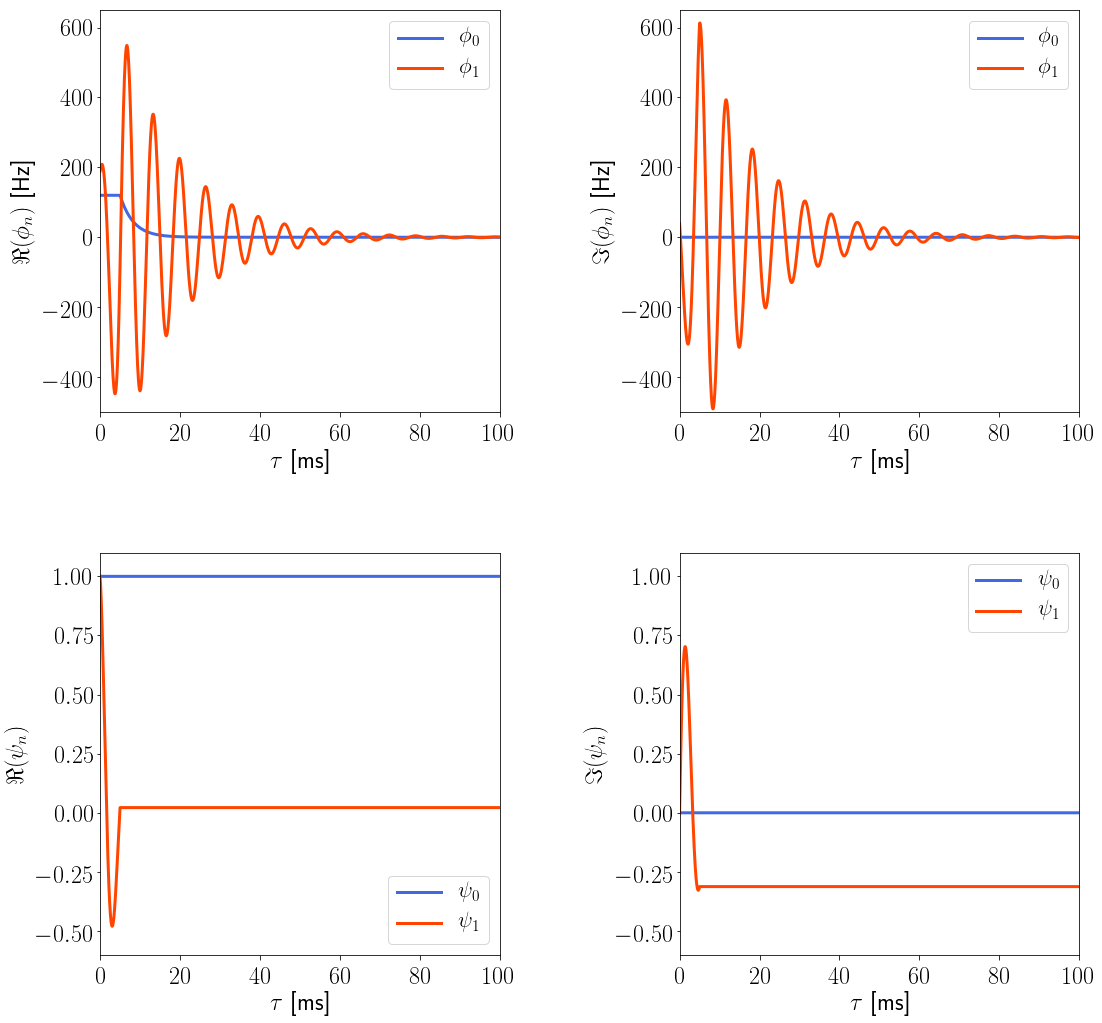

In [111]:
plt.figure(figsize=(16, 16))

plt.subplot(221)
plt.plot(tau_vec,Phi_0.real,lw=3,c='royalblue',label=r'$\phi_0$')
plt.plot(tau_vec,Phi_1.real,lw=3,c='orangered',label=r'$\phi_1$')
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$\Re(\phi_n)$ [Hz]')
plt.xlim(0,tau_max)
plt.ylim(-500,650)

plt.legend(fontsize='22')

plt.subplot(222)
plt.plot(tau_vec,Phi_0.imag,lw=3,c='royalblue',label=r'$\phi_0$')
plt.plot(tau_vec,Phi_1.imag,lw=3,c='orangered',label=r'$\phi_1$')
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$\Im(\phi_n)$ [Hz]')
plt.xlim(0,tau_max)
plt.ylim(-500,650)

plt.legend(fontsize='22')

plt.subplot(223)
plt.plot(tau_vec,Psi_0.real,lw=3,c='royalblue',label=r'$\psi_0$')
plt.plot(tau_vec,Psi_1.real,lw=3,c='orangered',label=r'$\psi_1$')
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$\Re(\psi_n)$')
plt.xlim(0,tau_max)
plt.ylim(-0.6,1.1)

plt.legend(fontsize='22')



plt.subplot(224)
plt.plot(tau_vec,Psi_0.imag,lw=3,c='royalblue',label=r'$\psi_0$')
plt.plot(tau_vec,Psi_1.imag,lw=3,c='orangered',label=r'$\psi_1$')
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$\Im(\psi_n)$')
plt.ylim(-0.6,1.1)
plt.xlim(0,tau_max)

plt.legend(fontsize='22')

plt.subplots_adjust(top=0.92, bottom=0.1, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.45)

plt.savefig('poisson_eigenfunction.pdf')

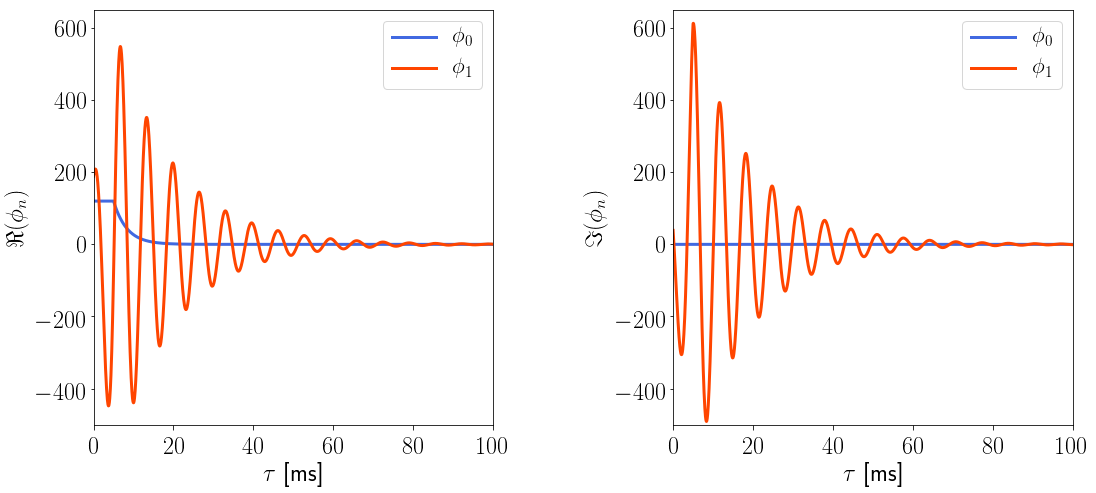

In [112]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.plot(tau_vec,Phi_0.real,lw=3,c='royalblue',label=r'$\phi_0$')
plt.plot(tau_vec,Phi_1.real,lw=3,c='orangered',label=r'$\phi_1$')
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$\Re(\phi_n)$')
plt.xlim(0,tau_max)
plt.ylim(-500,650)
plt.legend(fontsize='22')

plt.subplot(122)
plt.plot(tau_vec,Phi_0.imag,lw=3,c='royalblue',label=r'$\phi_0$')
plt.plot(tau_vec,Phi_1.imag,lw=3,c='orangered',label=r'$\phi_1$')
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$\Im(\phi_n)$')
plt.xlim(0,tau_max)
plt.ylim(-500,650)
plt.legend(fontsize='22')

plt.subplots_adjust(top=0.92, bottom=0.2, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.45)

plt.savefig('poisson_eigenfunction2.pdf')

## GAMMA PROCESS

In [41]:
a=10#int(1/(2*D))
b=0.1#a*mut_window=250
dt=0.05
tau_max=250
N=int(tau_max/dt)

tau_vec=[(j)*dt for j in range(N+1)]


In [42]:
def S(t,a,b):
    return 1-sc.special.gammainc(a,b*t)

def P(t,a,b):
    return (b**a)*(t**(a-1))*np.exp(-b*t)/sc.special.gamma(a)

def RHO(t,a,b):
    return P(t,a,b)/S(t,a,b)

In [43]:
P_=[1000*P(t,a,b) for t in tau_vec]
S_=[S(t,a,b) for t in tau_vec]
RHO_=[1000*RHO(t,a,b) for t in tau_vec]

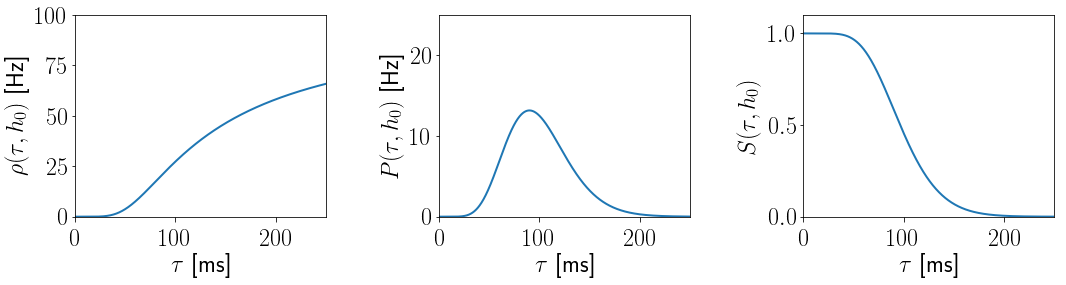

In [45]:
plt.figure(figsize=(16, 4))

plt.subplot(131)
plt.plot(tau_vec,RHO_,lw=2)
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$\rho(\tau,h_0)$ [Hz]')
plt.xlim(0,tau_max)
plt.ylim(0,100)
#plt.title(r'$ \nu= {}\:,\:\: \Delta={}$'.format(nu,d))

plt.subplot(132)
plt.plot(tau_vec,P_,lw=2)
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$P(\tau,h_0) $ [Hz]')
plt.xlim(0,tau_max)
plt.ylim(0,0.025*1000)
#plt.title(r'$ \nu= {}\:,\:\: \Delta={}$'.format(nu,d))


plt.subplot(133)
plt.plot(tau_vec,S_,lw=2)
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$S(\tau,h_0)$')
plt.xlim(0,tau_max)
plt.ylim(0,1.1)
#plt.title(r'$ \nu= {}\:,\:\: \Delta={}$'.format(nu,d))

plt.subplots_adjust(top=0.92, bottom=0.22, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.45)
plt.savefig('gamma.pdf')

In [46]:
def eigenvalue(n,a,b):
    return b*(np.exp(2*np.pi*1j*n/a)-1)


In [47]:
def Phi_n_Gamma(n,t,a,b):
    ln=eigenvalue(n,a,b)
    
    phin_0=1/(a*(b**a)*(b+ln)**(-a-1))
    
    return phin_0*np.exp(-ln*t)*S(t,a,b)


def Psi_n_Gamma(n,t,a,b):
    sum_=0
    ln=eigenvalue(n,a,b)
   
    
    s=(1-sc.special.gammainc(a,b*t))
    Pint=b**a*(b+ln)**(-a)*(1-sc.special.gammainc(a,(b+ln)*t)/sc.special.gamma(a))
    return np.exp(t*ln)*(1-Pint)/s
    

In [48]:

tau_max=250
N=int(tau_max/dt)

tau_vec=[(j)*dt for j in range(N+1)]

In [49]:
Phi_0=np.copy([Phi_n_Gamma(0,t,a,b) for t in tau_vec])
Phi_1=np.copy([Phi_n_Gamma(1,t,a,b) for t in tau_vec])
Phi_2=np.copy([Phi_n_Gamma(2,t,a,b) for t in tau_vec])

#Psi_0=np.copy([1 for t in tau_vec])
#Psi_1=np.copy([Psi_n_Gamma(1,t,a,b) for t in tau_vec])

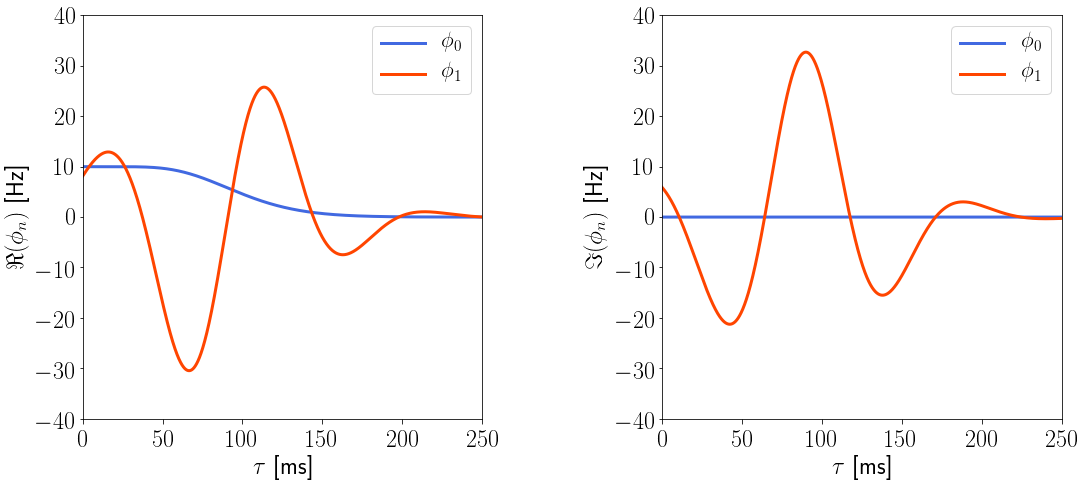

In [55]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.plot(tau_vec,1000*Phi_0.real,lw=3,c='royalblue',label=r'$\phi_0$')
plt.plot(tau_vec,1000*Phi_1.real,lw=3,c='orangered',label=r'$\phi_1$')
#plt.plot(tau_vec,Phi_2.real,lw=3,c='g',label=r'$\phi_2$')
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$\Re(\phi_n)$ [Hz]')
plt.xlim(0,tau_max)
plt.ylim(-40,40)
plt.legend(fontsize='22')

plt.subplot(122)
plt.plot(tau_vec,1000*Phi_0.imag,lw=3,c='royalblue',label=r'$\phi_0$')
plt.plot(tau_vec,1000*Phi_1.imag,lw=3,c='orangered',label=r'$\phi_1$')
#plt.plot(tau_vec,Phi_2.imag,lw=3,c='g',label=r'$\phi_2$')
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$\Im(\phi_n)$ [Hz]')
plt.xlim(0,tau_max)
plt.ylim(-40,40)
plt.legend(fontsize='22')




plt.subplots_adjust(top=0.92, bottom=0.22, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.45)

plt.savefig('gamma_eigenfunction.pdf')


# INVERSE GAUSSIAN

In [74]:
D=0.1
V_th=1
mu=0.3


t_max=30
dt=0.01
N_sim=int(t_max/dt)
          
t_vec=[dt*i for i in range(N_sim+1)]          

mean = 0
std = 1 

samples = np.random.normal(mean, std, size=N_sim+1)
V_t=np.zeros((N_sim+1,1))
S_t=np.zeros((N_sim+1,1))
    
sup= False
for i in range (N_sim):
    if sup==False:
        V_t[i+1]=V_t[i]+dt*(mu+np.sqrt(2*D/dt)*samples[i])
    else:
        V_t[i+1]=0
        sup=False
        
    if V_t[i+1]>=1:
        V_t[i+1]=1
        S_t[i+1]=1
        sup=True
   

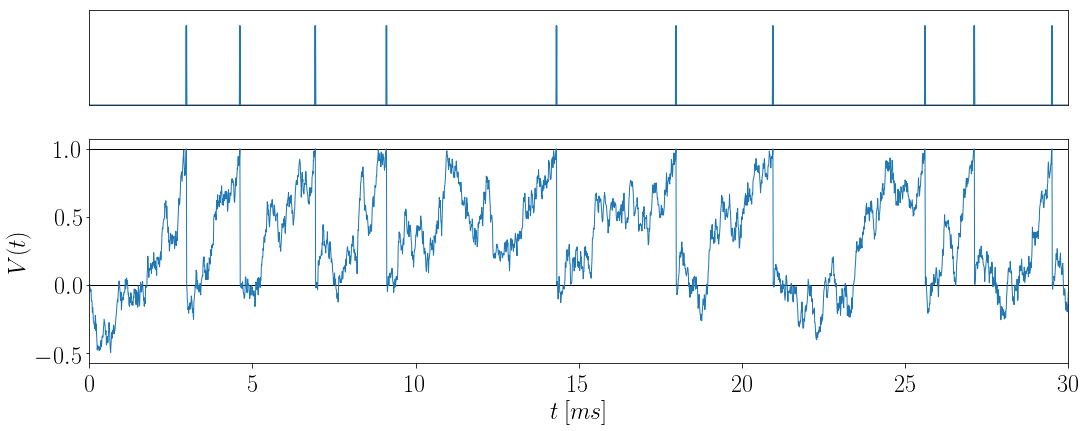

In [100]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(16, 7))

gridspec.GridSpec(3,1)
plt.subplot2grid((3,1), (0,0))
plt.plot(t_vec,S_t,lw=1.5)
plt.xlim(0,t_vec[-1])
plt.ylim(0,1.2)
plt.xticks([], [])
plt.yticks([], [])



plt.subplot2grid((3,1), (1,0),colspan=1, rowspan=2)
plt.plot([0,t_vec[-1]],[0,0],lw=1,c='k')
plt.plot([0,t_vec[-1]],[1,1],lw=1,c='k')
plt.plot(t_vec,V_t,lw=1)


plt.xlim(0,t_vec[-1])
plt.xlabel(r'$t \:[ms]$')
plt.ylabel(r'$V(t)$')
#plt.ylim(-0.3,1.2)
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.45)
#plt.savefig('PIF_V.pdf')


In [63]:
#Cv=0.3
#R=0.05

#V_th=1
#mu=R*V_th
#D=0.5*mu*V_th*Cv**2

D=0.1
V_th=1
mu=0.3


t_window=30
dt=0.1
N=int(t_window/dt)

N_sim=int(150/dt)

t_vec=[dt*(i+1) for i in range(N)]

def Prcv(t,mu,V_th,D):
    
    R=mu/V_th
    Cv=np.sqrt(2*D/(mu*V_th))
    
    if t==0:
        return 0
    else:
        return (Cv**(-1)/(np.sqrt(2*np.pi*R*t**3)))*np.exp(-Cv**(-2)*(R*t-1)**2/(2*R*t))
    
def P(t,mu,V_th,D):
    
    
    if t==0:
        return 0
    else:
        return (V_th/(np.sqrt(4*np.pi*D*t**3)))*np.exp(-(mu*t-V_th)**2/(4*D*t))

 
def PHI(x):
    return 0.5*(1+sc.special.erf(x/np.sqrt(2)))

In [64]:
def S(t,mu,V_th,D):
      
    if t==0:
        return 1
    else:
        return 1-PHI(np.sqrt(V_th**(2)/(t*2*D))*(t*mu/V_th-1))-np.exp(mu*V_th/D)*PHI(-np.sqrt(V_th**(2)/(t*2*D))*(t*mu/V_th+1))
    

In [65]:
def RHO(t,mu,V_th,D):
    if t==0:
        return 0
    else:  
        return P(t,mu,V_th,D)/S(t,mu,V_th,D)#-(np.log(S(t+dt))-np.log(S(t-dt)))/(2*dt)

In [66]:
tau_max=30
N=int(tau_max/dt)

tau_vec=[(j)*dt for j in range(N+1)]


In [67]:
P_=[P(t,mu,V_th,D) for t in tau_vec]
S_=[S(t,mu,V_th,D) for t in tau_vec]
RHO_=[RHO(t,mu,V_th,D) for t in tau_vec]

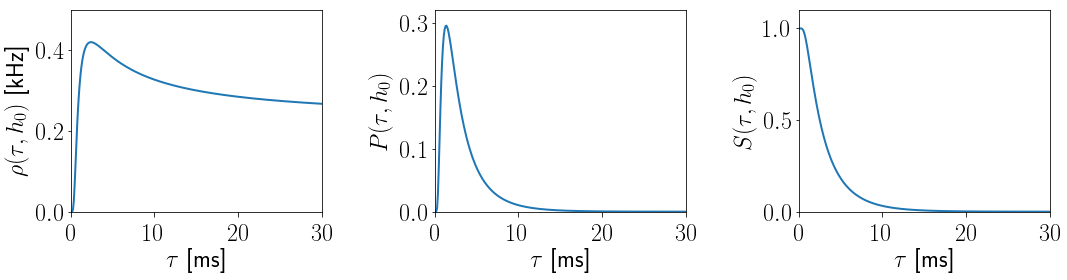

In [68]:
plt.figure(figsize=(16, 4))

plt.subplot(131)
plt.plot(tau_vec,RHO_,lw=2)
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$\rho(\tau,h_0)$ [kHz]')
plt.xlim(0,tau_max)
plt.ylim(0,0.5)
#plt.title(r'$ \nu= {}\:,\:\: \Delta={}$'.format(nu,d))

plt.subplot(132)
plt.plot(tau_vec,P_,lw=2)
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$P(\tau,h_0)$')
plt.xlim(0,tau_max)
plt.ylim(0,0.32)
#plt.title(r'$ \nu= {}\:,\:\: \Delta={}$'.format(nu,d))


plt.subplot(133)
plt.plot(tau_vec,S_,lw=2)
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(r'$S(\tau,h_0)$')
plt.xlim(0,tau_max)
plt.ylim(0,1.1)
#plt.title(r'$ \nu= {}\:,\:\: \Delta={}$'.format(nu,d))

plt.subplots_adjust(top=0.92, bottom=0.22, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.45)
#plt.savefig('inversegaussian.pdf')

POISSON CONSTANT INPUT

In [143]:
#REFRACTORINESS
d=5

#TIME PARAMETER
dt=0.01

t_max=50
N_sim=int(t_max/dt)
tsim=[i*dt for i in range(N_sim)]

#NU PARAMETER 
nu_max=0.6

# H PARMETER
h_0=mu_0
tau_m=10
    

In [144]:
A_wc=np.zeros((N_sim+1,1))
#nu_0=phih(h[0],nu_max,beta,h_0)
A_wc[0]=1/dt #nu_0/(1+d*nu_0)


d_index=int(d/dt)

for i in range(N_sim):
    t=i*dt
    
    if i<d_index:
        jstart=0
        #first_A=d_index-i-1
        first_A=0
    else:
        jstart=i-d_index+1
        first_A=0
    
 
    nu_wc=nu_max/2
    A_wc[i+1]=nu_wc*(1-(np.sum(A_wc[jstart:i+1])+first_A*A_wc[0])*dt)
   
A_wc=A_wc[:-1]


In [146]:
def eigenvalue(n,nu,d):
    return (1/d)*sc.special.lambertw(d*nu*np.exp(nu*d), k=n)-nu

def psi0phi0(n,nu,d):
    l=eigenvalue(n,nu,d)
    return (nu+l)/(d*(nu+l)+1)

In [149]:
Nmax=100

activity=np.zeros((N_sim,Nmax+1))

nu=nu_max/2

l=eigenvalue(0,nu,d)
coeff=psi0phi0(0,nu,d)
for i in range(N_sim):
    t=i*dt
    activity[i,0]+=(np.exp(t*l)*coeff).real

for idx in range(Nmax):
    n=idx+1
    l=eigenvalue(n,nu,d)
    coeff=psi0phi0(n,nu,d)
    for i in range(N_sim):
        t=i*dt
        activity[i,n]+=activity[i,n-1]+ 2*(np.exp(t*l)*coeff).real



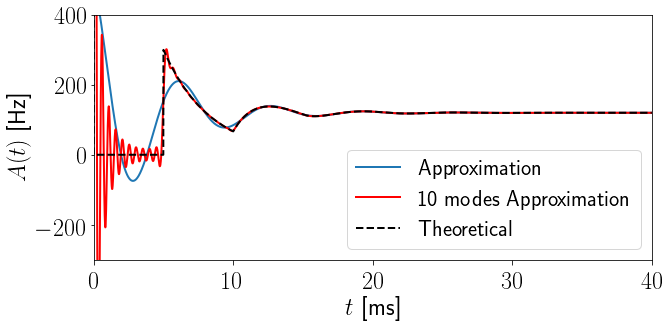

In [167]:
plt.figure(figsize=(10, 5))
plt.plot(tsim,1000*np.copy(activity[:,1]),label='Approximation',ls='-',lw=2)
plt.plot(tsim,1000*np.copy(activity[:,10]),label='10 modes Approximation',c='r',ls='-',lw=2)
plt.plot(tsim,1000*np.copy(A_wc),label='Theoretical',c='k',ls='--',lw=2)



plt.legend(loc='lower right',fontsize=22)
plt.ylim(-300,400)
plt.xlim(0,40)
plt.xlabel(r'$t$ [ms]')
plt.ylabel(r'$A(t)$ [Hz]')
plt.gcf().subplots_adjust(bottom=0.2)

plt.savefig('delta_poisson.pdf')